<a href="https://colab.research.google.com/github/valdenio458/livro-python-para-analise-de-dados/blob/main/capitulo_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotagem e visualização

## 9.1 Introdução rápida à API do matplotlib

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = np.arange(10)

In [ ]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

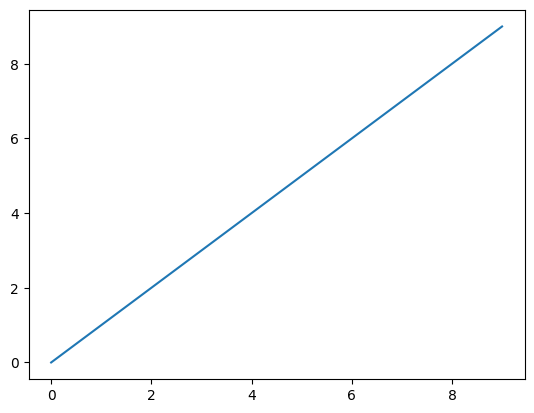

In [ ]:
plt.plot(data)

### Figuras e subplotagens

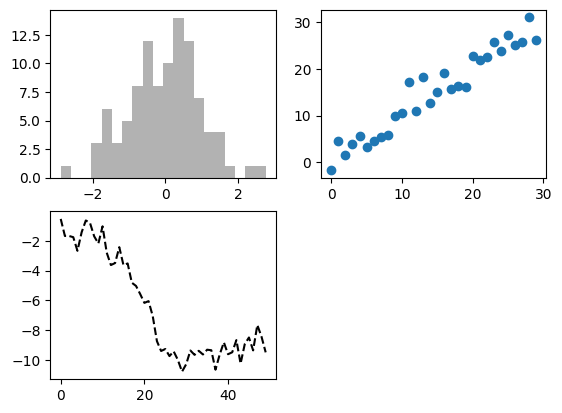

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3);
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30));

### Cores, marcadores e estilos de linhas

In [40]:
x = [2, 4, 6]
y = [5, 7, 9]

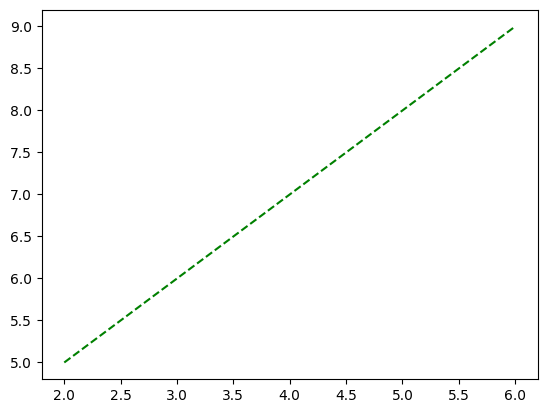

In [49]:
# Informa o estilo da linha e sua cor
plt.plot(x, y, 'g--')

# Este código poderia ter sido escrito mais explicitamente, assim:
# plt.plot(x, y, linestyle='--', color='green')

In [44]:
from numpy.random import randn

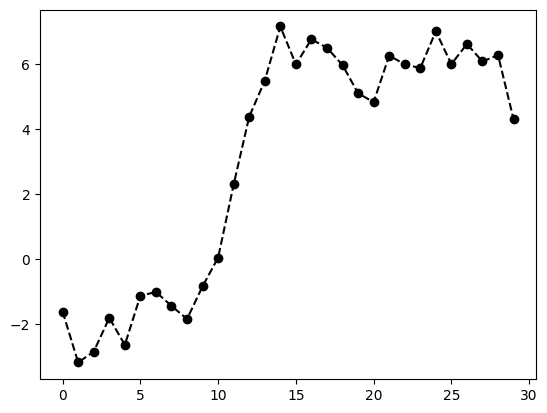

In [48]:
# .cumsum(): Realiza a soma cumulativa dos números aleatórios gerados anteriormente.
# Cada elemento no array resultante é a soma acumulativa dos elementos anteriores.

# 'ko--': Define o estilo da linha no gráfico. 'k' significa preto (black),
# 'o' significa marcadores redondos e '--' significa linha tracejada.

plt.plot(randn(30).cumsum(), 'ko--')

# Este código poderia ter sido escrito mais explicitamente, assim:
# plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')